# CDDP Tutorial (HCW)

This tutorial runs a simple example of the constrained differential dynamic programming algorithm on spacecraft linear relative motion control problem.

In [ ]:
# If needed, run the following lines:
using Pkg
Pkg.precompile()

In [1]:
using Plots; gr(legend=true,dpi=800); 
using LinearAlgebra
using BenchmarkTools
using Printf
using Revise
using CDDP

## Define the Dynamics Model

In [2]:
includet("../src/models/HCW.jl")
model = HCW()
x_dim, u_dim = model.x_dim, model.u_dim
;

## Define Problem Horizon and Steps

In [3]:
tf = 5000.0
tN = 500
dt = (tf - 0.0)/tN;

## Define the Cost Function

In [4]:
function ell_cost(
    x::Vector,
    u::Vector,
    x_ref::Vector{Float64};
)
    Q = zeros(6, 6)
    R = Diagonal(1e+2*[1; 1; 1])
    return transpose(x - x_ref) * Q * (x - x_ref) + transpose(u) * R * u
end

function phi_cost(
    x::Vector,
    x_final::Vector{Float64};
)
    Qf = Diagonal([1e+2 * [1; 1; 1]; 1e+1 * [1; 1; 1]])
    return transpose(x - x_final) * Qf * (x - x_final)
end
;

## Define the boundary conditions

In [5]:
x_init = model.x_init
x_final = model.x_final;

Initial trajectory

In [6]:
X0, U0 = initialize_trajectory(model);

## Construct the Problem

In [7]:
prob = iLQRProblem(model, tf, tN, dt, x_dim, u_dim, ell_cost, phi_cost, model.f!, x_init, x_final, nothing);

## Solve iLQR Problem

In [9]:
sol = solve_ilqr(prob)
X, U, J, gains = sol.X, sol.U, sol.J, sol.gains;
X_ilqr, U_ilqr, J_ilqr, gains_ilqr = sol.X, sol.U, sol.J, sol.gains;

**************************************************************************************
>>> Start iLQR Problem Solver 
**************************************************************************************
iter    objective   inf_pr     inf_du   lg(mu)   |d|   lg(rg)  alpha_du   alpha_pr   ls
                
0       40.594916,  
                
1       0.086875,  
                


2       0.009312,  
                
3       0.003508,  
                


4       0.000718,  
                
5       0.000116,  
                
6       0.000050,  
                
7       0.000046,  
                


8       0.000046,  
                
9       0.000046,  
                


**************************************************************************************
>>> Successfully Finished iLQR Problem Solver <<< 
**************************************************************************************


## Plot Trajectory

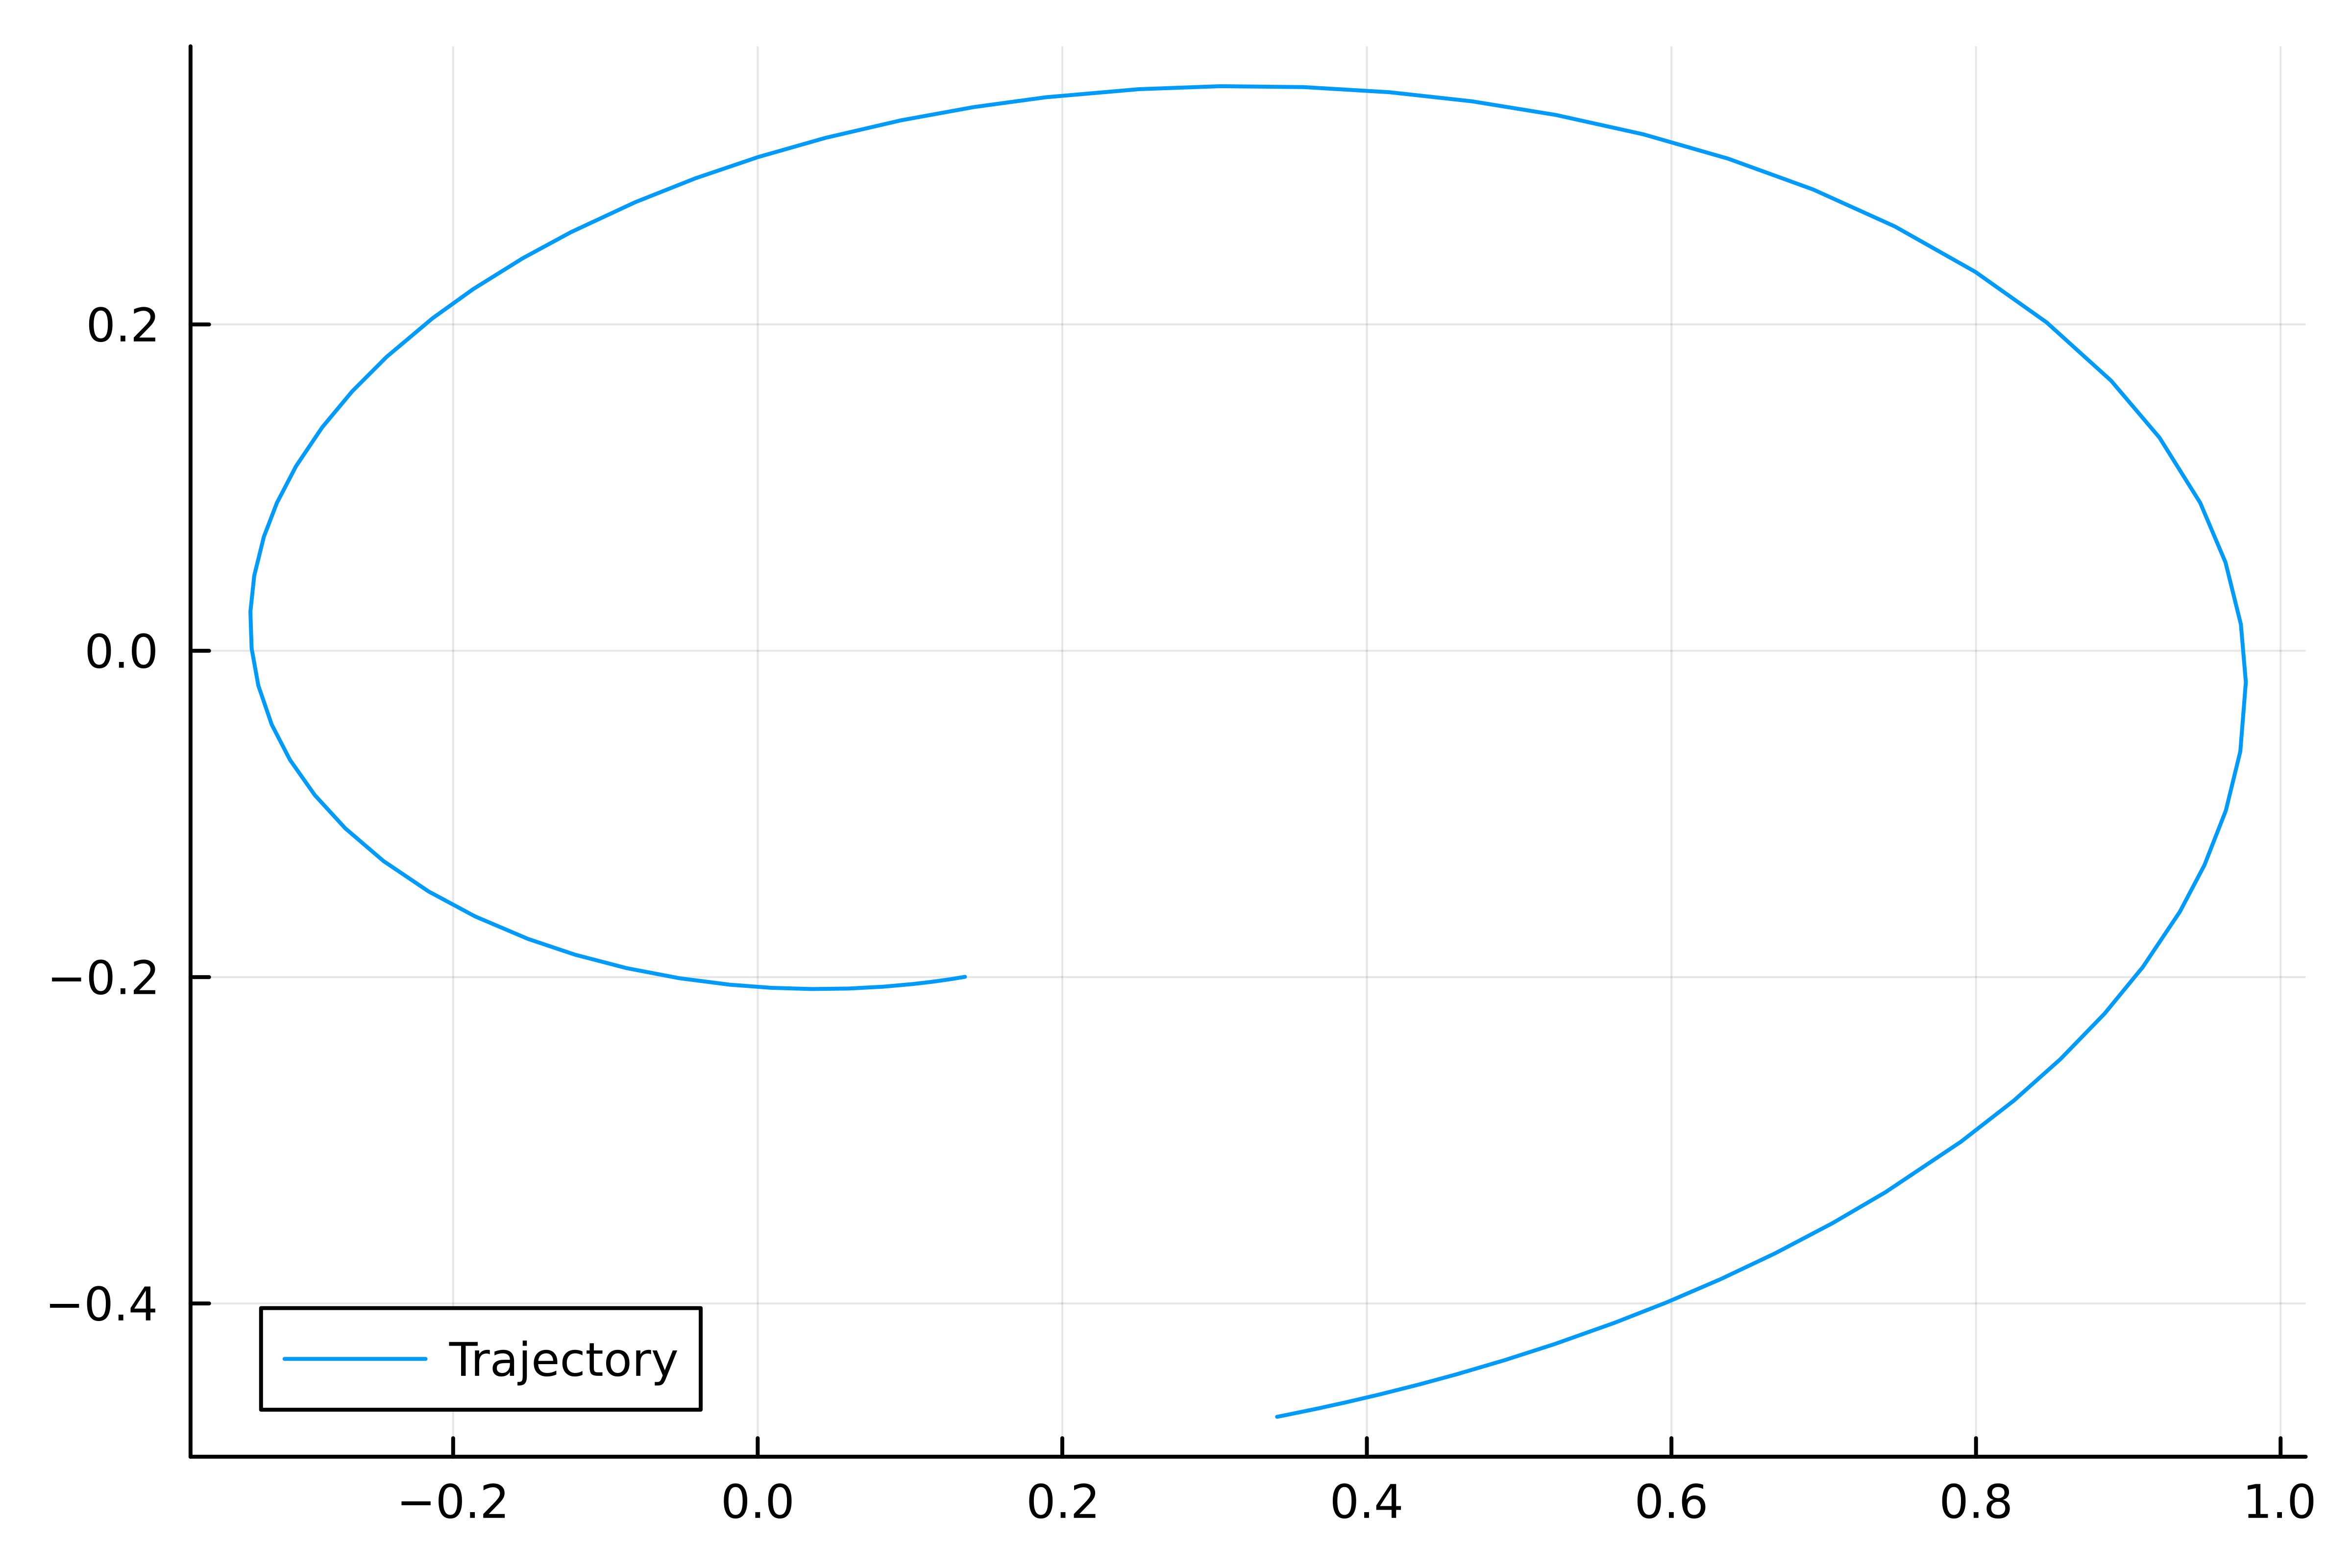

In [21]:
plot(X[2,:],X[1,:],label="Trajectory")

In [122]:
function c(
    x::Vector,
    u::Vector,
)
    x0 = [45; 135]
    r_scale = 200

    return [
        1e-0 * (20 / r_scale - norm(x[1:2] - x0 / r_scale))
        1e-0 * (10 / r_scale - norm(x[1:2]))
    ]
end
λ_dim = 2

2

In [132]:
prob = CDDPProblem(model, tf, tN, dt, x_dim, u_dim, λ_dim, ell_cost, phi_cost, model.f!, x_init, x_final, c, empty, nothing);
# sol = solve_cddp(prob,reg_param1=1e-2,reg_param2=1e-2,μip=1e-10, max_ite=10, verbose=true) 
# sol = solve_cddp(prob, X=X_ilqr, U=U_ilqr,max_ite=20); 
sol = solve_cddp(prob, X=X_ilqr, U=U_ilqr, reg_param1=1e-4,reg_param2=1e-4,μip=1e-8,max_ite=10); 
X, U, J, gains = sol.X, sol.U, sol.J, sol.gains;
X_cddp, U_cddp, J_cddp, gains_cddp = sol.X, sol.U, sol.J, sol.gains;

**************************************************************************************
>>> Start CDDP Problem Solver 
**************************************************************************************
isfeasible: false
iter    objective   inf_pr     inf_du   lg(mu)   |d|   lg(rg)  alpha_du   alpha_pr   ls
                
0       Inf,  
                


isfeasible_new: true isfeasible: falsey[[-2.3219672396398607, -1.674504910662535], [-2.291276540547364, -1.6978260577419302], [-2.2608960275383305, -1.721505498352228], [-2.230829996494469, -1.7455220233147333], [-2.2010825338768, -1.7698544710665975], [-2.1716575013524646, -1.7944815258064615], [-2.1425585178307784, -1.8193812965399692], [-2.113788941808492, -1.8445304703180894], [-2.085351867319731, -1.8699026254616598], [-2.057250172699636, -1.8954648937840466], [-2.0294867288596006, -1.9211713631036749], [-2.0020650286601667, -1.94695006977569], [-1.974990881718705, -1.972677335446061], [-1.9482766742030944, -1.9981271710195851], [-1.9219516535572723, -2.02287152612838], [-1.8960860741493617, -2.046083646424525], [-1.870846740042045, -2.0661504348776747], [-1.8466227965094757, -2.079908339726067], [-1.8243071327992153, -2.0811371889353336], [-1.8059196373269688, -2.0575914268680715], [-1.7959762236318266, -1.985148627332889], [-1.8044751050626557, -1.8162764203040964], [-1.85337210

, [4.716221006642574e60, 7.6132758203393335e59], [9.532922224087833e60, 1.5906110345612056e60], [1.9273620730416745e61, 3.323170438522012e60], [3.89764876303086e61, 6.942844321817036e60], [7.883902476813712e61, 1.450502290365912e61], [1.5950569362699158e62, 3.03036947451026e61], [3.2277880598018644e62, 6.330950245083059e61], [6.533191445711285e62, 1.3226299039753827e62], [1.322620312131556e63, 2.7631460377573073e62], [2.6781351100501596e63, 5.772518323989516e62], [5.42394788834565e63, 1.2059315622991626e63], [1.0987089676525023e64, 2.5192757307886626e63], [2.2260377738001616e64, 5.262889297745817e63], [4.510906274794363e64, 1.0994310445610902e64], [9.142718504826805e64, 2.2967126664291794e64], [1.8533871924662523e65, 4.797774828737808e64], [3.757814643511347e65, 1.0022293880557029e65], [7.620477533208116e65, 2.0935722621838383e65], [1.5456317219512828e66, 4.373224044772113e65], [3.1354966610372347e66, 9.134983458894793e65], [6.361839966490133e66, 1.908118322308895e66], [1.2910257795098

, [7.937587925681078e94, -7.751505610344886e94], [7.383215800313756e94, -7.148172026777037e94], [6.834747243127064e94, -6.558538984431542e94], [6.2958718780442515e94, -5.9853557613257705e94], [5.769576899561673e94, -5.430733285257799e94], [5.258262354688758e94, -4.896268052361728e94], [4.76384083272378e94, -4.383145689826716e94], [4.287822726924927e94, -3.8922268831788265e94], [3.831388335422281e94, -3.424117813972683e94], [3.395448045103761e94, -2.9792270494397407e94], [2.980691820548212e94, -2.5578106282910187e94], [2.587629172821151e94, -2.160006972150841e94], [2.2166206894247993e94, -1.7858632856814667e94], [1.867902348351664e94, -1.4353543463563709e94], [1.5416035653750198e94, -1.108395217766976e94], [1.2377599917841184e94, -8.048489125745446e93], [9.563220094016738e93, -5.24529966105406e93], [6.971597998887237e93, -2.6720481822692623e93], [4.600658017289991e93, -3.258981186621498e92], [2.4475527564076037e93, 1.7965238394651458e93], [5.0865667768627197e92, 3.69917310342849e93], [-

DomainError: DomainError with -2.3219672396398607:
log will only return a complex result if called with a complex argument. Try log(Complex(x)).
DomainError detected in the user `f` function. This occurs when the domain of a function is violated.
For example, `log(-1.0)` is undefined because `log` of a real number is defined to only output real
numbers, but `log` of a negative number is complex valued and therefore Julia throws a DomainError
by default. Cases to be aware of include:

* `log(x)`, `sqrt(x)`, `cbrt(x)`, etc. where `x<0`
* `x^y` for `x<0` floating point `y` (example: `(-1.0)^(1/2) == im`)

Within the context of SciML, this error can occur within the solver process even if the domain constraint
would not be violated in the solution due to adaptivity. For example, an ODE solver or optimization
routine may check a step at `new_u` which violates the domain constraint, and if violated reject the
step and use a smaller `dt`. However, the throwing of this error will have halted the solving process.

Thus the recommended fix is to replace this function with the equivalent ones from NaNMath.jl
(https://github.com/JuliaMath/NaNMath.jl) which returns a NaN instead of an error. The solver will then
effectively use the NaN within the error control routines to reject the out of bounds step. Additionally,
one could perform a domain transformation on the variables so that such an issue does not occur in the
definition of `f`.

For more information, check out the following FAQ page:
https://docs.sciml.ai/Optimization/stable/API/FAQ/#The-Solver-Seems-to-Violate-Constraints-During-the-Optimization,-Causing-DomainErrors,-What-Can-I-Do-About-That?


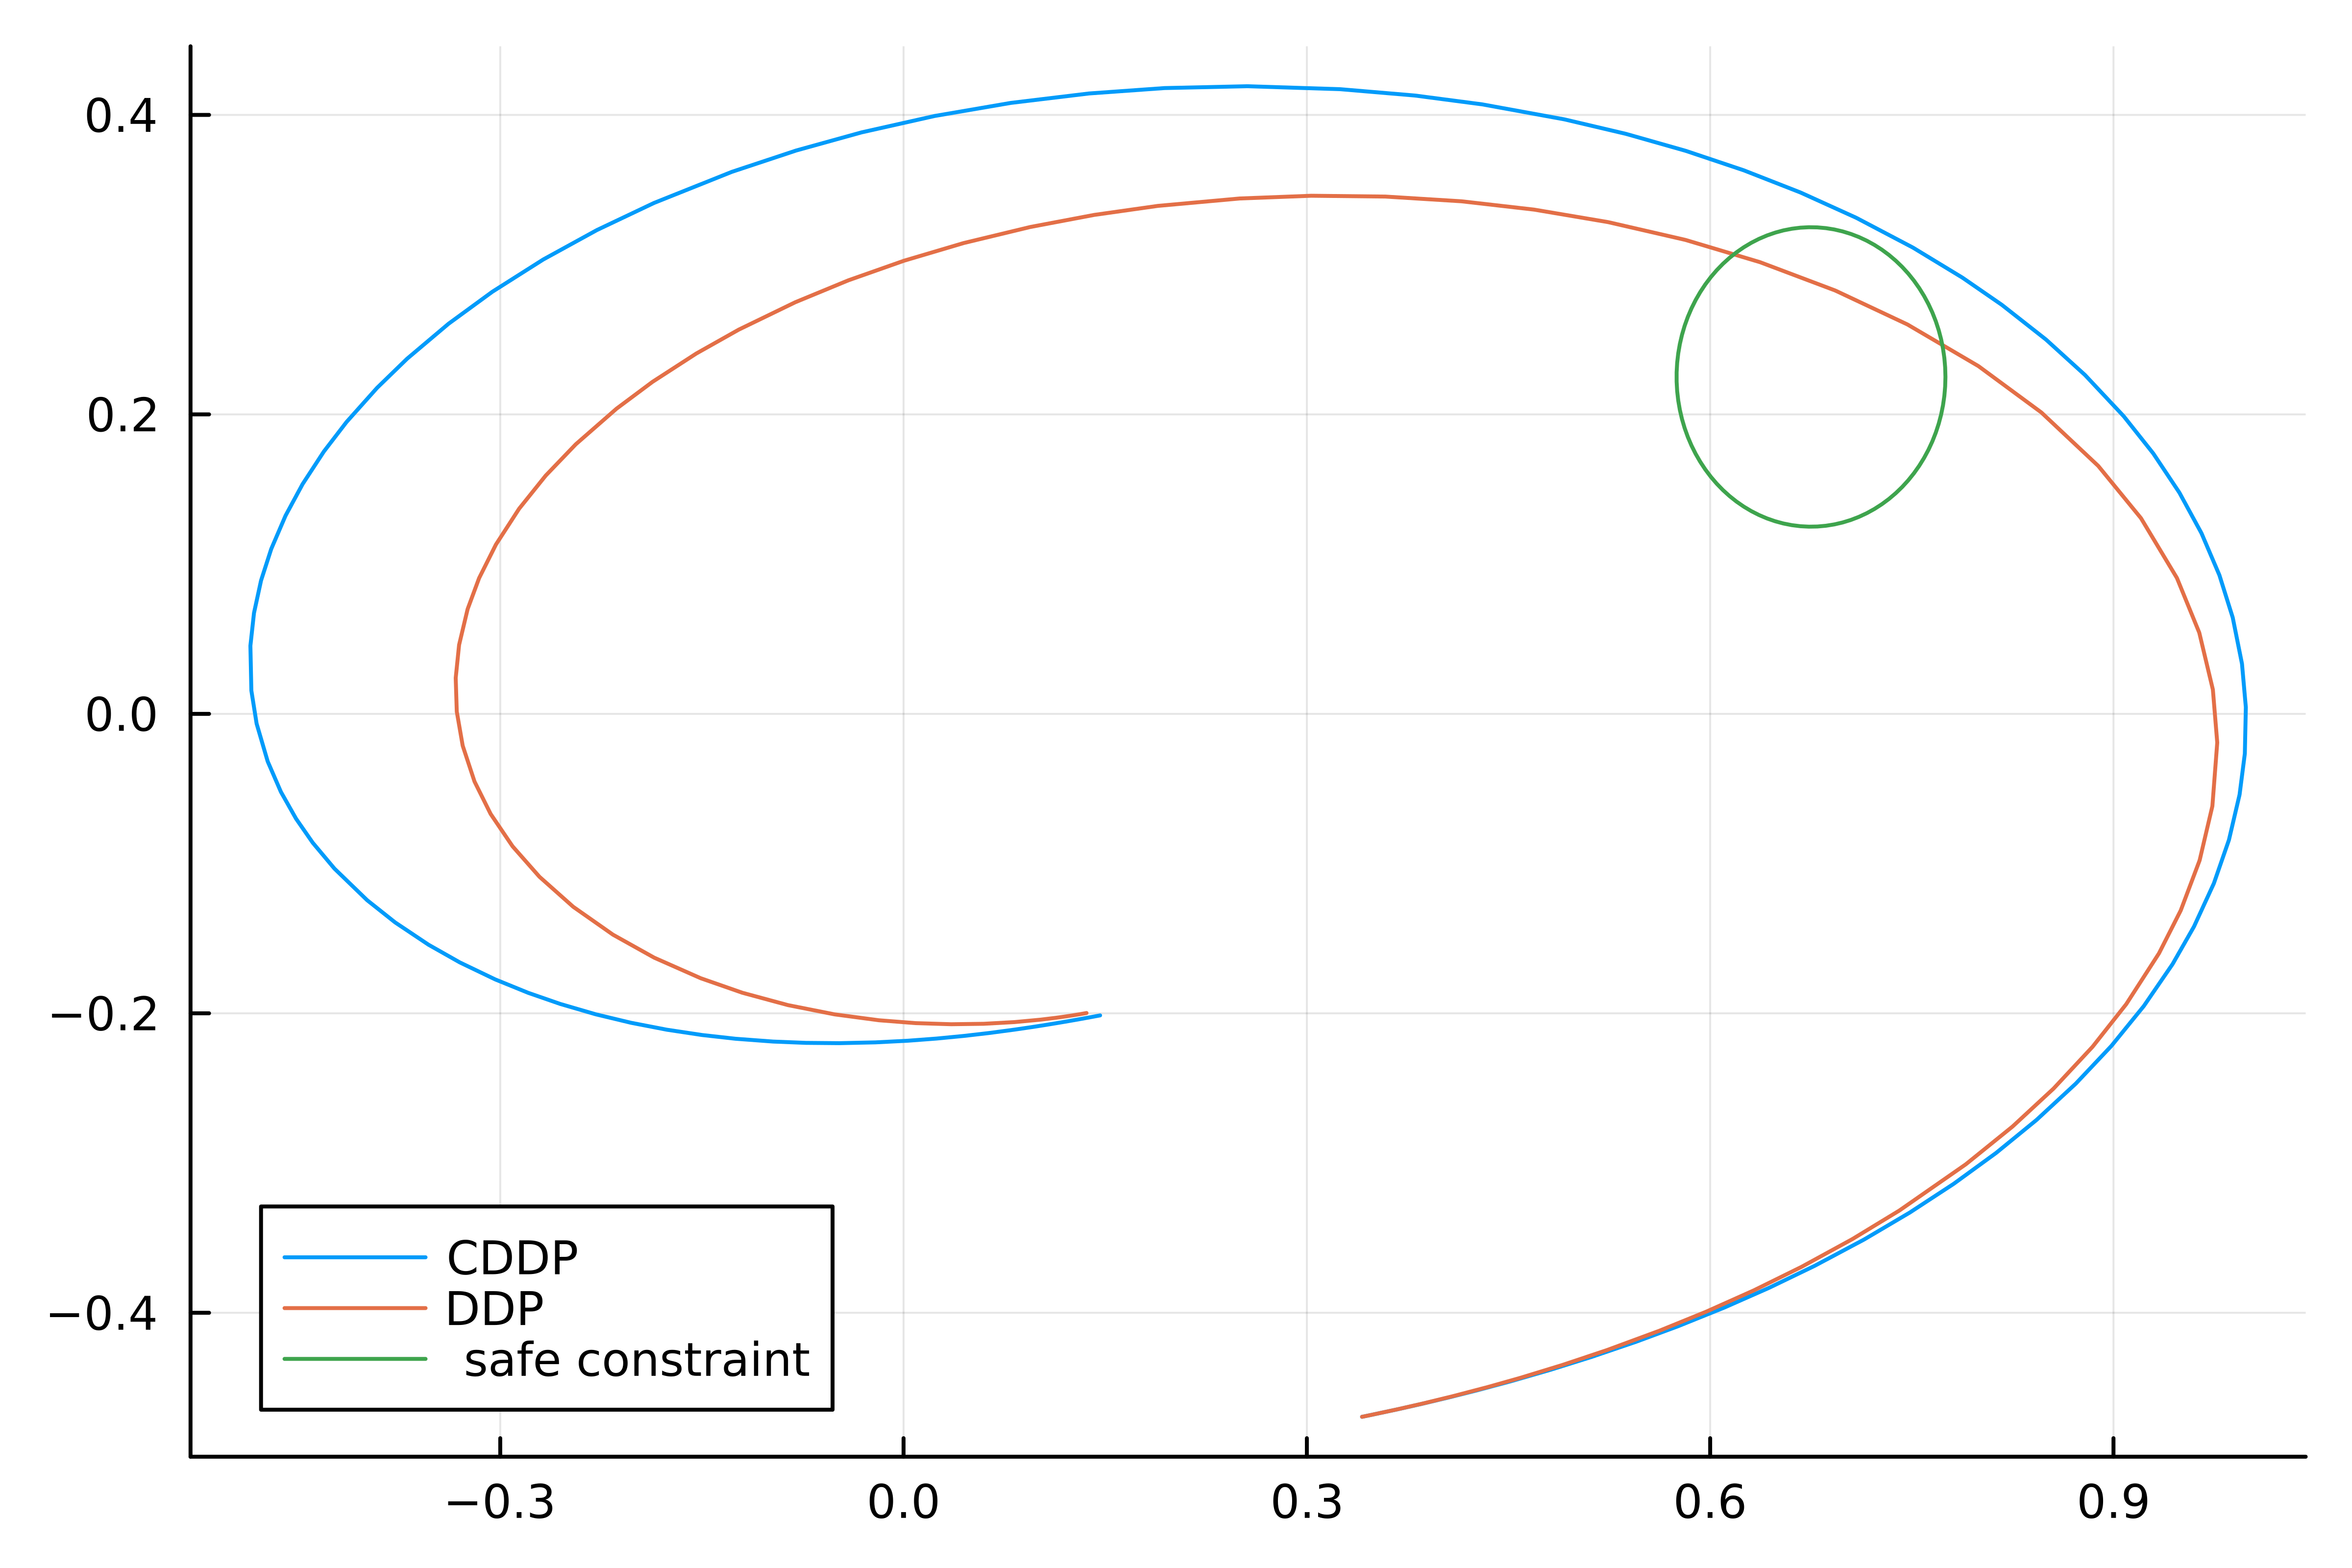

In [128]:
t = LinRange(0,pi,100)
x = zeros(size(t,1))
y = zeros(size(t,1))
for k = 1:size(t,1)
    x[k] = (20*sin(2*t[k]) + 45) / 200
    y[k] = (20*cos(2*t[k]) + 135) / 200
end

plot(X_cddp[2,:], X_cddp[1,:], label="CDDP")
plot!(X_ilqr[2,:], X_ilqr[1,:], label="DDP")
plot!(y,x,color=:auto,label=" safe constraint",linewidth=1)
# plot(X[2,:],X[1,:],label="CDDP")
# plot!(X_ilqr[2,:],X_ilqr[1,:],label="ilqr")

## Two-body Problem

In [144]:
includet("../src/models/TwoBody.jl")
model = TwoBody()
x_dim, u_dim = model.x_dim, model.u_dim
;


In [145]:
tf = 8.162395951775
tN = 500
dt = (tf - 0.0)/tN
;

In [146]:
X0, U0 = initialize_trajectory(model)
plot(X0[2,:],X0[1,:],label="Initial Trajectory")

ErrorException: type TwoBody has no field r_scale

In [137]:
function ell_cost(
    x::Vector,
    u::Vector,
    x_ref::Vector{Float64};
)
    Q = zeros(6, 6)
    R = Diagonal(1e+2*[1; 1; 1])
    return transpose(x - x_ref) * Q * (x - x_ref) + transpose(u) * R * u
end

function phi_cost(
    x::Vector,
    x_final::Vector{Float64};
)
    Qf = Diagonal([1e+2 * [1; 1; 1]; 1e+1 * [1; 1; 1]])
    return transpose(x - x_final) * Qf * (x - x_final)
end
;

In [138]:
x_init = model.x_init
x_final = model.x_final;

In [139]:
prob = iLQRProblem(model, tf, tN, dt, x_dim, u_dim, ell_cost, phi_cost, model.f!, x_init, x_final, nothing)
sol = solve_ilqr(prob)
X, U, J, gains = sol.X, sol.U, sol.J, sol.gains;
X_ilqr, U_ilqr, J_ilqr, gains_ilqr = sol.X, sol.U, sol.J, sol.gains;

**************************************************************************************
>>> Start iLQR Problem Solver 
**************************************************************************************


ErrorException: type TwoBody has no field r_scale